URL del repositorio de GitHub :https://github.com/dcm00/OAI-PMH/blob/main/cahill_dcm00_metadata.ipynb

# OAI-PMH

La documentación del protocolo la podéis encontrar aquí:

https://www.openarchives.org/OAI/openarchivesprotocol.html

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
```

In [1]:
import xml.etree.ElementTree as ET
import requests
import json

### Identify

This verb is used to retrieve information about a repository. Some of the information returned is required as part of the OAI-PMH. Repositories may also employ the Identify verb to return additional descriptive information.

In [2]:
import xml.etree.ElementTree as ET
import requests

base_url = "https://zenodo.org/oai2d"
action = "?verb=Identify"
print("Request to: %s%s" % (base_url, action))
oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)
print(oai.text)
#Iterator para recorrer todos los elementos (incluso anidados)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

#Findall para encontrar un elemento específico
namespaces = {'ns': 'http://www.openarchives.org/OAI/2.0/'} # add more as needed
elementos = xmlTree.findall('.//ns:baseURL',namespaces)
print(elementos) #Element
for e in elementos:
    print("BaseURL:", e.text)

Request to: https://zenodo.org/oai2d?verb=Identify
<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/xsl/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2021-01-04T16:09:29Z</responseDate>
  <request verb="Identify">https://zenodo.org/oai2d</request>
  <Identify>
    <repositoryName>Zenodo</repositoryName>
    <baseURL>https://zenodo.org/oai2d</baseURL>
    <protocolVersion>2.0</protocolVersion>
    <adminEmail>info@zenodo.org</adminEmail>
    <earliestDatestamp>2014-02-03T14:41:33Z</earliestDatestamp>
    <deletedRecord>no</deletedRecord>
    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>
  </Identify>
</OAI-PMH>

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2021-01-04T16:09:29Z
{http://www.openarchi

### Listar tipos de metadatos

ListMetadataFormats

This verb is used to retrieve the metadata formats available from a repository. An optional argument restricts the request to the formats available for a specific item.


In [3]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListMetadataFormats'

oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2021-01-04T16:09:30Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats: 
    
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.loc.gov/MARC21/slim
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite4
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://datacite.org/schema/kernel-4
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.

Podemos capturar sólo la información relevante

In [4]:
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix') or (elem.tag == '{http://www.openarchives.org/OAI/2.0/}schema'):
        print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite4
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: dcat
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-3/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marc21
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.ope

O de forma más "elegante"

In [5]:
for e in xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}metadataFormat'):
    metadataPrefix = e.find('{http://www.openarchives.org/OAI/2.0/}metadataPrefix').text
    schema = e.find('{http://www.openarchives.org/OAI/2.0/}schema').text
    print(metadataPrefix, ':', schema)

marcxml : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
oai_datacite4 : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
dcat : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_datacite : http://schema.datacite.org/meta/kernel-3/metadata.xsd
marc21 : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
datacite : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd
datacite4 : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd


Podemos describir el último schema

In [6]:
oai_datacite = requests.get('http://schema.datacite.org/meta/kernel-4.1/metadata.xsd') #Peticion al servidor
print(oai_datacite.text)

#Para crear el arbol XML
xmlTree = ET.fromstring(oai_datacite.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Revision history
  2010-08-26 Complete revision according to new common specification by the metadata work group after review. AJH, DTIC
  2010-11-17 Revised to current state of kernel review, FZ, TIB
  2011-01-17 Complete revsion after community review. FZ, TIB
  2011-03-17 Release of v2.1: added a namespace; mandatory properties got minLength; changes in the definitions of relationTypes IsDocumentedBy/Documents and isCompiledBy/Compiles; changes type of property "Date" from xs:date to xs:string. FZ, TIB
  2011-06-27 v2.2: namespace: kernel-2.2, additions to controlled lists "resourceType", "contributorType", "relatedIdentifierType", and "descriptionType". Removal of intermediate include-files.
  2013-07-24 v3.0: namespace: kernel-3.0; delete LastMetadataUpdate & MetadateVersionNumber; additions to controlled lists "contributorType", "dateType", "descriptionType", "relationType", "relatedIdentifierType" & "resourceType"; deletion of "StartDa

{http://www.w3.org/2001/XMLSchema}attribute
{http://www.w3.org/2001/XMLSchema}element
{http://www.w3.org/2001/XMLSchema}annotation
{http://www.w3.org/2001/XMLSchema}documentation
{http://www.w3.org/2001/XMLSchema}simpleType
{http://www.w3.org/2001/XMLSchema}restriction
{http://www.w3.org/2001/XMLSchema}simpleType
{http://www.w3.org/2001/XMLSchema}restriction
{http://www.w3.org/2001/XMLSchema}pattern
{http://www.w3.org/2001/XMLSchema}simpleType
{http://www.w3.org/2001/XMLSchema}restriction
{http://www.w3.org/2001/XMLSchema}minLength
{http://www.w3.org/2001/XMLSchema}attributeGroup
{http://www.w3.org/2001/XMLSchema}attribute
{http://www.w3.org/2001/XMLSchema}attribute
{http://www.w3.org/2001/XMLSchema}simpleType
{http://www.w3.org/2001/XMLSchema}restriction
{http://www.w3.org/2001/XMLSchema}pattern
{http://www.w3.org/2001/XMLSchema}complexType
{http://www.w3.org/2001/XMLSchema}all
{http://www.w3.org/2001/XMLSchema}element
{http://www.w3.org/2001/XMLSchema}element
{http://www.w3.org/2001/

Si analizamos la descripción del estándar, vemos que las etiquetas de los metadatos están almacenados en la etiqueta "element", en el atributo "name". Podemos obetener un listado de lo que esperamos encontrar

In [7]:
namespaces = {'xs' : 'http://www.w3.org/2001/XMLSchema'}
for tags in xmlTree.findall('.//xs:element',namespaces):
    print ('Metadato: ',tags.attrib['name'])

Metadato:  resource
Metadato:  identifier
Metadato:  creators
Metadato:  creator
Metadato:  creatorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  titles
Metadato:  title
Metadato:  publisher
Metadato:  publicationYear
Metadato:  resourceType
Metadato:  subjects
Metadato:  subject
Metadato:  contributors
Metadato:  contributor
Metadato:  contributorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  dates
Metadato:  date
Metadato:  language
Metadato:  alternateIdentifiers
Metadato:  alternateIdentifier
Metadato:  relatedIdentifiers
Metadato:  relatedIdentifier
Metadato:  sizes
Metadato:  size
Metadato:  formats
Metadato:  format
Metadato:  version
Metadato:  rightsList
Metadato:  rights
Metadato:  descriptions
Metadato:  description
Metadato:  br
Metadato:  geoLocations
Metadato:  geoLocation
Metadato:  geoLocationPlace
Metadato:  geoLocationPoint
Metadato:  geoLocationBo

### ListIdentifiers

This verb is an abbreviated form of ListRecords, retrieving only headers rather than records. Optional arguments permit selective harvesting of headers based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted.

Devuelve la cabecera de los registros, para conocer la información esencial.

Necesita el prefijo del formato de metadatos

In [8]:
#prefijo: oai_datacite4
base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListIdentifiers'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text) #Identifiers are really important because they are used to ask more information

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2021-01-04T16:09:36Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3469217
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-02T20:51:40Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3469197
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-02T20:51:08Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3469189
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-02T20:50:58Z
{http://www.openarchives.org

{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3342727
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-09-20T11:50:54Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3342639
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-09-20T11:47:53Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3342189
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-09-20T12:41:37Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3342065
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-07-19T07:05:49Z
{http://www.openarchives.org/OAI/2.0/}setSpec: openaire
{http://www.openarchives

### ListRecords

Listar los registros

This verb is used to harvest records from a repository. Optional arguments permit selective harvesting of records based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted. No metadata will be present for records with deleted status.

In [9]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)

xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2021-01-04T16:09:36Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3469217
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-02T20:51:40Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              

2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-09-30
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4676.1.1
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:1507FFF87D14FFD5FFEBFFD4FFA4FFC2
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/1507FFF87D14FFD5FFEBFFD4FFA4FFC2
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3468945
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3469188
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit

{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-09-30
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4676.1.1
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:1507FFF87D14FFD5FFEBFFD4FFA4FFC2
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/1507FFF87D14FFD5FFEBFFD4FFA4FFC2
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3468945
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3468974
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{htt

{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Huang, Siyao
{http://datacite.org/schema/kernel-4}givenName
Siyao
{http://datacite.org/schema/kernel-4}familyName
Huang
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Xu, Yongqiang
{http://datacite.org/schema/kernel-4}givenName
Yongqiang
{http://datacite.org/schema/kernel-4}familyName
Xu
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Wu, Haomin
{http://datacite.org/schema/kernel-4}givenName
Haomin
{http://datacite.org/schema/kernel-4}familyName
Wu
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Chen, Tianpeng
{http://datacite.org/schema/kernel-4}givenName
Tianpeng
{http://datacite.org/schema/kernel-4}familyName
Chen
{http://datacite.org/schema/kernel-4}creator

                

{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3465157
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-09-30T09:35:53Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3465157
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Cadena-Castañeda, Oscar J.
{http://datacite.org/sche

{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Ingrisch, Sigfrid
{http://datacite.org/schema/kernel-4}givenName
Sigfrid
{http://datacite.org/schema/kernel-4}familyName
Ingrisch
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
MAP 1 in Revision of the genus Rhytidaspis Redtenbacher, 1891 including the description of a new genus Haudrhytidaspis gen. nov. (Orthoptera: Tettigoniidae: Conocephalinae)
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-08-28
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.or

FIGURES 8‒11 in Taxonomic study of the genus Promalactis Meyrick, 1908 (Lepidoptera Oecophoridae) V. The unistriatella species group, with descriptions of seven new species
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-09-12
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4668.4.10
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFDBFF99FFAFFF9AFFED2B69FFA9FFD8
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFDBFF99FFAFFF

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3449311
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-01T13:24:13Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3449311
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Oliveira, Carlos Alexandre Miranda
{http://da

Animalia
{http://datacite.org/schema/kernel-4}subject
Arthropoda
{http://datacite.org/schema/kernel-4}subject
Entognatha
{http://datacite.org/schema/kernel-4}subject
Collembola
{http://datacite.org/schema/kernel-4}subject
Entomobryidae
{http://datacite.org/schema/kernel-4}subject
Homidia
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-09-18
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://treatment.plazi.org/id/03B7602068204D099EFBFE701BA4760A
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4671.3.3
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FF8E185868214D0C9E6CFFFA18237749
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FF8E185868214D0C9E6CFFFA18237749
{http://datacite.org/schema/kernel-4

{http://datacite.org/schema/kernel-4}creatorName
Kuhlmann, Michael
{http://datacite.org/schema/kernel-4}givenName
Michael
{http://datacite.org/schema/kernel-4}familyName
Kuhlmann
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
Fig. 3 in Revision of the South African endemic bee genus Redivivoides Michener, 1981 (Hymenoptera: Apoidea: Melittidae)
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2012
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}subject
Animalia
{http://datacite.org/schema/kernel-4}subject
Arthropoda
{http://datacite.org/schema/kernel-4}subject
Insecta
{http://datacite.org/schema/kernel-4}subject
Hymenoptera
{http://datacite.org/schema/kernel-4}subject
Melittidae
{http://datacite.org/schema/ker

{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3383737
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Groom, Q. Į.
{http://datacite.org/schema/kernel-4}givenName
Q. Į.
{http://datacite.org/schema/kernel-4}familyName
Groom
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
O'Reilly, C.
{http://datacite.org/schema/kernel-4}givenName
C.
{http://datacite.org/schema/kernel-4}familyName
O'Reilly
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Humphrey, T.
{http://datacite

{http://datacite.org/schema/kernel-4}creatorName
Williams, David J
{http://datacite.org/schema/kernel-4}givenName
David J
{http://datacite.org/schema/kernel-4}familyName
Williams
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Hay, Simon I
{http://datacite.org/schema/kernel-4}givenName
Simon I
{http://datacite.org/schema/kernel-4}familyName
Hay
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Pigott, David M
{http://datacite.org/schema/kernel-4}givenName
David M
{http://datacite.org/schema/kernel-4}familyName
Pigott
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
Figure 1 in Vulnerability to snakebite envenoming: a global mapping of hotspots
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2018
{http://datacite.org/schema/kernel-4}subjects

   

                  
{http://datacite.org/schema/kernel-4}creatorName
Schillo, Dorothee
{http://datacite.org/schema/kernel-4}givenName
Dorothee
{http://datacite.org/schema/kernel-4}familyName
Schillo
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Wipfler, Benjamin
{http://datacite.org/schema/kernel-4}givenName
Benjamin
{http://datacite.org/schema/kernel-4}familyName
Wipfler
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Undap, Nani
{http://datacite.org/schema/kernel-4}givenName
Nani
{http://datacite.org/schema/kernel-4}familyName
Undap
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Papu, Adelfia
{http://datacite.org/schema/kernel-4}givenName
Adelfia
{http://datacite.org/schema/kernel-4}familyName
Papu
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/sche

Dzul-Manzanilla
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Manrique-Saide, Pablo
{http://datacite.org/schema/kernel-4}givenName
Pablo
{http://datacite.org/schema/kernel-4}familyName
Manrique-Saide
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Amorim, Dalton De Souza
{http://datacite.org/schema/kernel-4}givenName
Dalton De Souza
{http://datacite.org/schema/kernel-4}familyName
Amorim
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURE 8 in Psectrosciara Kieffer in Mexico (Diptera: Scatopsidae): two new species and additional records for the genus
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite

{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4585.1.9
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:1C37FF8A5362FFD77C15F55BFD36FFEA
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/2636323
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/1C37FF8A5362FFD77C15F55BFD36FFEA
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3351333
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
FIGURE 10. (Continued)
{http://www.openarchives.org/OAI

{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3343016
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/iatlantic-project-collection
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Restricted Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
<p>Presentation made at the iAtlantic kick-off meeting in Edinburgh, Scotland, June 2019</p>

<p>&nbsp;</p>
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3343009
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-07-19T15:03:08Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-iatlantic-project-collection
{http://www.openarchives.org/OAI/2.0/}metadata

   

{http://datacite.org/schema/kernel-4}creatorName
Bonaldo, Alexandre B.
{http://datacite.org/schema/kernel-4}givenName
Alexandre B.
{http://datacite.org/schema/kernel-4}familyName
Bonaldo
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Brescovit, Antonio D.
{http://datacite.org/schema/kernel-4}givenName
Antonio D.
{http://datacite.org/schema/kernel-4}familyName
Brescovit
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Harvey, Mark S.
{http://datacite.org/schema/kernel-4}givenName
Mark S.
{http://datacite.org/schema/kernel-4}familyName
Harvey
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURES 7A–F in A revision of the new world goblin spider genus Cinetomorpha Simon, 1892 revalidated from Gamasomorpha Karsch, 1881 (Araneae, Oonopidae, Oonopinae)
{http://datacite.org/schema/kernel-4}publisher
Zenod

{http://datacite.org/schema/kernel-4}givenName
R.T.
{http://datacite.org/schema/kernel-4}familyName
Springthorpe
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURE 2 in Talitrid amphipods from India, East Africa and the Red Sea (Amphipoda, Senticaudata, Talitroidea, Talitridae)
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-07-17
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4638.3.3
{http://datacite.org/schema/kernel-4}relatedId

{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}subject
Animalia
{http://datacite.org/schema/kernel-4}subject
Arthropoda
{http://datacite.org/schema/kernel-4}subject
Insecta
{http://datacite.org/schema/kernel-4}subject
Hymenoptera
{http://datacite.org/schema/kernel-4}subject
Dryinidae
{http://datacite.org/schema/kernel-4}subject
Apoaphelopus
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-07-10
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4630.1.1
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFD0FF9AFFAF2A48FFA9D64EFFE1FF87
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFD0FF9AFFAF2A48FFA9D64EFFE1FF87
{http://datacite.org/schema/kernel-4}relatedIdentifier
h

{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3335805
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-09-18T11:38:21Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3335805
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Mauffray, William F.
{http://datacite.org/schema/kernel-4}givenName
William F.
{http://datacite.org/schema/

{http://datacite.org/schema/kernel-4}familyName
Campbell
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURE 5 in Additional data on the herpetological collection of Louis Amédée Lantz (1886 - 1953), with emphasis on specimens in the Natural History Museum, London
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-07-15
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4638.1.4
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:ls

Routh, Devin
{http://datacite.org/schema/kernel-4}givenName
Devin
{http://datacite.org/schema/kernel-4}familyName
Routh
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Zohner, Constantin M.
{http://datacite.org/schema/kernel-4}givenName
Constantin M.
{http://datacite.org/schema/kernel-4}familyName
Zohner
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Crowther, Thomas W.
{http://datacite.org/schema/kernel-4}givenName
Thomas W.
{http://datacite.org/schema/kernel-4}familyName
Crowther
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
Fig. S3 in Supplementary Material for The global tree restoration potential
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/sc

## Ejercicio 1

Muestra sólo el identificador y las palabras clave (subject)

In [10]:
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://datacite.org/schema/kernel-4}identifier') or (elem.tag == '{http://datacite.org/schema/kernel-4}subject'):
        if (elem.tag == '{http://datacite.org/schema/kernel-4}identifier'):
            print("")
            print(elem.tag.rpartition('}')[2]+": "+elem.text)
        else:
            print(elem.tag.rpartition('}')[2]+": "+elem.text)        


identifier: 10.5281/zenodo.3469217
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3469197
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3469189
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3469039
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3468993
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3468975
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3468234
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3468073
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3467857
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3466310
subject: Biodiversity
subject: Taxonomy
subject: Animalia
subject: Nematoda
subject: Chromadorea
subject: Rhabditida
subject: Heligmonellidae
subject: Flannerystrongylus

identifier: 10.5281/zenodo.3465860
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.346515

subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3336656
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3336654
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335946
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335805
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335354
subject: Biodiversity
subject: Taxonomy
subject: Animalia
subject: Arthropoda
subject: Insecta
subject: Hymenoptera
subject: Tenthredinidae
subject: Acrogymnidia

identifier: 10.5281/zenodo.3335286
subject: Biodiversity
subject: Taxonomy
subject: Animalia
subject: Porifera
subject: Demospongiae
subject: Astrophorida
subject: Geodiidae
subject: Penares

identifier: 10.5281/zenodo.3335282
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335046
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335038
subject: Biodiversity
subject: Taxonomy

identifier: 10.5281/zenodo.3335036
su

## Filtros

Registros entre dos fechas

In [11]:
import xml.etree.ElementTree as ET

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'
bounds = "&from='2019-01-01'&until='2019-12-31'" #Para filtrar por fechas

oai = requests.get(base_url + action + params + bounds)
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2021-01-04T16:09:43Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3469217
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-02T20:51:40Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              

CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3468993
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Bello', Cesare
{http://datacite.org/schema/kernel-4}givenName
Cesare
{http://datacite.org/schema/kernel-4}familyName
Bello'
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Osella, Giuseppe
{http://datacite.org/schema/kernel-4}givenName
Giuseppe
{http://datacite.org/schema/kernel-4}familyName
Osella
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Baviera, Cosimo
{http://datacite.org/schema/kernel-4}givenName
Cosimo
{http://datacite.org/schema/kernel-4}familyName
Baviera
{http://


                  
{http://datacite.org/schema/kernel-4}creatorName
Granda, Juan Manuel Cardona
{http://datacite.org/schema/kernel-4}givenName
Juan Manuel Cardona
{http://datacite.org/schema/kernel-4}familyName
Granda
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
García, Alexander García
{http://datacite.org/schema/kernel-4}givenName
Alexander García
{http://datacite.org/schema/kernel-4}familyName
García
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Tumbrinck, Josef
{http://datacite.org/schema/kernel-4}givenName
Josef
{http://datacite.org/schema/kernel-4}familyName
Tumbrinck
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURE 19. Scaria ferruginea Hancock, 1909 in Systematics and biogeography of the genus Scaria Bolívar, 1887 (Orthoptera: Tetrigidae: Batrachideinae)
{http://datacite.org/schem

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://treatment.plazi.org/id/03D17B73FFDA6D77D9CD688886A84872
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4674.5.6
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFE8030BFFDB6D74D95A6D1684364C0D
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFE8030BFFDB6D74D95A6D1684364C0D
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3465101
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3465102
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
FIGURES 1–3. Taiyutyla caseophila, new species. Fig

{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURES 7–9. Hylophasma luica Sheng, Li in First record of Hylophasma Townes (Hymenoptera, Ichneumonidae, Cryptinae) from Palaearctic region
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}subject
Animalia
{http://datacite.org/schema/kernel-4}subject
Arthropoda
{http://datacite.org/schema/kernel-4}subject
Insecta
{http://datacite.org/schema/kernel-4}subject
Hymenoptera
{http://datacite.org/schema/kernel-4}subject
Ichneumonidae
{http://datacite.org/schema/kernel-4}subject
Hylophasma
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-09-10
{http://datacite.

{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3442216
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-09-18T09:55:21Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3442216
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Li, Zhu
{http://datacite.org/schema/kernel-4}givenNa

2012-12-19
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://treatment.plazi.org/id/038587E4FFD4FFEAFDCDFD2F93D0FD72
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://treatment.plazi.org/id/038587E4FFDCFFE2FDF3FA0593D0FD11
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5852/ejt.2012.34
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFBCFF9CFFD6FFECFFABFFF1925FFFCE
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFBCFF9CFFD6FFECFFABFFF1925FFFCE
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3433816
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3433827
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

    

{http://datacite.org/schema/kernel-4}date
2019-07-01
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4624.3.4
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFE9FFFFFFE5D53EFF82FF85917BC330
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFE9FFFFFFE5D53EFF82FF85917BC330
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3264566
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3429370
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
FI

Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2014-12-31
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.1179/2042349714Y.0000000041
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFDCFFA5371B027D482DF82D5E5C6270
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFDCFFA5371B027D482DF82D5E5C6270
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3383729
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3383736
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descrip

Taxonomy
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/schema/kernel-4}date
2019-08-27
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4661.1.7
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFD0FFF7114D8448D41FC21AFF89F837
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFD0FFF7114D8448D41FC21AFF89F837
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3378606
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3378619
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descriptions

oai:zenodo.org:3363780
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-16T14:28:40Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3363780
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Schillo, Dorothee
{http://datacite.org/schema/kernel-4}givenName
Dorothee
{http://datacite.org/schema/kernel-4}familyName
Schillo
{http://datacite.org/schem

Dalton De Souza
{http://datacite.org/schema/kernel-4}familyName
Amorim
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURE 8 in Psectrosciara Kieffer in Mexico (Diptera: Scatopsidae): two new species and additional records for the genus
{http://datacite.org/schema/kernel-4}publisher
Zenodo
{http://datacite.org/schema/kernel-4}publicationYear
2019
{http://datacite.org/schema/kernel-4}subjects

                
{http://datacite.org/schema/kernel-4}subject
Biodiversity
{http://datacite.org/schema/kernel-4}subject
Taxonomy
{http://datacite.org/schema/kernel-4}subject
Animalia
{http://datacite.org/schema/kernel-4}subject
Arthropoda
{http://datacite.org/schema/kernel-4}subject
Insecta
{http://datacite.org/schema/kernel-4}subject
Diptera
{http://datacite.org/schema/kernel-4}subject
Scatopsidae
{http://datacite.org/schema/kernel-4}subject
Psectrosciara
{http://datacite.org/schema/kernel-4}dates

                
{http://datacite.org/s

2019-09-27T03:53:38Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3351332
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Shimonoya, Mitsuru
{http://datacite.org/schema/kernel-4}givenName
Mitsuru
{http://datacite.org/schema/kernel-4}familyName
Shimonoya
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kerne

10.5281/zenodo.3343016
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/iatlantic-project-collection
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Restricted Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
<p>Presentation made at the iAtlantic kick-off meeting in Edinburgh, Scotland, June 2019</p>

<p>&nbsp;</p>
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3343009
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-07-19T15:03:08Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-iatlantic-project-collection
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuali

{http://datacite.org/schema/kernel-4}creatorName
Bonaldo, Alexandre B.
{http://datacite.org/schema/kernel-4}givenName
Alexandre B.
{http://datacite.org/schema/kernel-4}familyName
Bonaldo
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Brescovit, Antonio D.
{http://datacite.org/schema/kernel-4}givenName
Antonio D.
{http://datacite.org/schema/kernel-4}familyName
Brescovit
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Harvey, Mark S.
{http://datacite.org/schema/kernel-4}givenName
Mark S.
{http://datacite.org/schema/kernel-4}familyName
Harvey
{http://datacite.org/schema/kernel-4}titles

                
{http://datacite.org/schema/kernel-4}title
FIGURES 7A–F in A revision of the new world goblin spider genus Cinetomorpha Simon, 1892 revalidated from Gamasomorpha Karsch, 1881 (Araneae, Oonopidae, Oonopinae)
{http://datacite.org/schema/kernel-4}publisher
Zenod

{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3338746
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Lowry, J.K.
{http://datacite.org/schema/kernel-4}givenName
J.K.
{http://datacite.org/schema/kernel-4}familyName
Lowry
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Springthorpe, R.

{http://datacite.org/schema/kernel-4}rights
Open Access
{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
FIGURE 196. Habitus of Gonatopus species, group 5: A, B: Gonatopus sp. in dorsal (A) and lateral (B) view. Scale bar: A: 1.90 mm; B: 2.35 mm.
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3336668
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-10T12:19:34Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

        

{http://datacite.org/schema/kernel-4}date
2019-07-11
{http://datacite.org/schema/kernel-4}resourceType
Figure
{http://datacite.org/schema/kernel-4}relatedIdentifiers

                
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.11646/zootaxa.4633.1.1
{http://datacite.org/schema/kernel-4}relatedIdentifier
urn:lsid:plazi.org:pub:FFB15C6D5A5FD469FFCE4A6EFF89FFFD
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://publication.plazi.org/id/FFB15C6D5A5FD469FFCE4A6EFF89FFFD
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/record/3335342
{http://datacite.org/schema/kernel-4}relatedIdentifier
http://treatment.plazi.org/id/038824155A4BD47DFF594B6BFCC9FAAA
{http://datacite.org/schema/kernel-4}relatedIdentifier
10.5281/zenodo.3335353
{http://datacite.org/schema/kernel-4}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-4}rightsList

                
{http://datacite.org/schema/kernel-4}rights
Open Access
{

{http://datacite.org/schema/kernel-4}descriptions

                
{http://datacite.org/schema/kernel-4}description
<p>Raw Data of 11th July 2019</p>
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3334219
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-07-13T07:06:49Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
4.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3334219
{http://datacite.org/schema/kernel-4}creators

                
{http://datacite.org/sc

{http://datacite.org/schema/kernel-4}givenName
Roy E.
{http://datacite.org/schema/kernel-4}familyName
Halling
{http://datacite.org/schema/kernel-4}affiliation
New York Botanical Garden, New York, United States of America
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Bandala, Victor
{http://datacite.org/schema/kernel-4}givenName
Victor
{http://datacite.org/schema/kernel-4}familyName
Bandala
{http://datacite.org/schema/kernel-4}affiliation
Red Biodiversidad y Sistemática, Veracruz, Mexico
{http://datacite.org/schema/kernel-4}creator

                  
{http://datacite.org/schema/kernel-4}creatorName
Lumyong, Saisamorn
{http://datacite.org/schema/kernel-4}givenName
Saisamorn
{http://datacite.org/schema/kernel-4}familyName
Lumyong
{http://datacite.org/schema/kernel-4}affiliation
Academy of Science, The Royal Society of Thailand, Bangkok, Thailand|Chiang Mai University , Chiang Mai, Thailand
{http://datacite.org/schema/ker

### GetRecord

This verb is used to retrieve an individual metadata record from a repository. Required arguments specify the identifier of the item from which the record is requested and the format of the metadata that should be included in the record. Depending on the level at which a repository tracks deletions, a header with a "deleted" value for the status attribute may be returned, in case the metadata format specified by the metadataPrefix is no longer available from the repository or from the specified item.

Obtener objeto digital de ese recurso

In [12]:
import xml.etree.ElementTree as ET
import urllib

base_url = 'https://zenodo.org/oai2d'
action = '?verb=GetRecord'
params =  '&metadataPrefix=oai_datacite4&identifier=oai:zenodo.org:3363479'
print(base_url + action + params)
oai = requests.get(base_url + action + params)
print(oai.text)
xmlTree = ET.fromstring(oai.text)
ns = {'oai' : 'http://www.openarchives.org/OAI/2.0/'}

#iterator = xmlTree.iter()
#for elem in iterator:
 #   print(elem.tag)
 #   print(elem.text)

for tags in xmlTree.findall('.//',ns):
    print (tags.tag+": ",tags.text)

https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_datacite4&identifier=oai:zenodo.org:3363479
<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/xsl/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2021-01-04T16:09:48Z</responseDate>
  <request verb="GetRecord" metadataPrefix="oai_datacite4" identifier="oai:zenodo.org:3363479">https://zenodo.org/oai2d</request>
  <GetRecord>
    <record>
      <header>
        <identifier>oai:zenodo.org:3363479</identifier>
        <datestamp>2019-09-25T11:13:44Z</datestamp>
        <setSpec>user-biosyslit</setSpec>
      </header>
      <metadata>
        <oai_datacite xmlns="http://schema.datacite.org/oai/oai-1.0/" xsi:schemaLocation="http://schema.datacite.org/oai/oai-1.0/ oai_datacite.xsd">
          <isReferenceQu

## APIs específicas

El protocolo OAI-PMH ofrece una serie de funcionalidades genéricas e interoperables entre distintos repositorios. Sin embargo, existen ciertas limitaciones que no nos permiten automatizar todo lo necesario para analizar un gran número de dataset. Para ello, tenemos que recurrir a APIs específicas de los repositorios con los que trabajamos.

Zenodo proporciona una API bastante completa que complementa al protocolo OAI-PMH. En el siguiente enlace podemos ver su especificación y algunos ejemplos con curl y python.

http://developers.zenodo.org/

Entre otras cosas, podemos automatizar el proceso de publicación, descargar archivos, etc.

También, obteniendo el DOI de un recurso, podemos resolverlo para obtener cierta información específica, como la URL del objeto digital entre otras.

In [14]:
import json
#Buscamos datasets específicos-
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=datacite3')
oaiTree = ET.fromstring(oai.text)
#for i in oaiTree.iter():
#    print(i.tag)
records = oaiTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')
for e in records:
    for subject in e.findall('.//{http://datacite.org/schema/kernel-3}subject'):
        if "Animalia" in subject.text:
            print("Title: "+e.findall('.//{http://datacite.org/schema/kernel-3}title')[0].text)
            identifier = e.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text
            print(identifier)
            resourceType = e.findall('.//{http://datacite.org/schema/kernel-3}resourceType')[0].text
            print(resourceType)
            print('\n')
            
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/958140',headers)
record = json.loads(r.text)
print(record['files'])

    

Title: FIGURES 1–15. Flannerystrongylus abulus n. gen., n in Gastrointestinal nematodes of Paramelomys platyops (Rodentia: Muridae) from Papua Indonesia and Papua New Guinea with the descriptions of a new genus and five new species of Heligmonellidae (Nematoda: Trichostrongylina) and a key to the species of Hughjonestrongylus
10.5281/zenodo.3466310
Figure


Title: FIGURE 19. Scaria ferruginea Hancock, 1909 in Systematics and biogeography of the genus Scaria Bolívar, 1887 (Orthoptera: Tetrigidae: Batrachideinae)
10.5281/zenodo.3465157
Figure


Title: FIGURE 12. Scaria producta Hancock, 1907 in Systematics and biogeography of the genus Scaria Bolívar, 1887 (Orthoptera: Tetrigidae: Batrachideinae)
10.5281/zenodo.3465143
Figure


Title: FIGURES 1–3. Taiyutyla caseophila, new species. Fig. 1 in Cave millipedes of the United States. XVI. Two new species from Oregon Caves National Monument, Oregon (Chordeumatida, Conotylidae and Caseyidae)
10.5281/zenodo.3465103
Figure


Title: FIGURES 1–2 in

# Ejercicio

* 1: Busca al menos dos repositorios digitales compatibles con OAI-PMH
* 2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes filtrar por la descripción o en las palabras clave).
* 3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.
* 4: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías?
* 5: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...). 

**1: Busca al menos dos repositorios digitales compatibles con OAI-PMH**

Datacite: https://datacite.org/oaipmh.html
        
Figshare: https://help.figshare.com/article/how-to-use-the-oai-pmh

**2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes filtrar por la descripción o en las palabras clave).**

**Usamos ListRecords para encontrar los recursos y seleccionar uno:**

In [15]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://oai.datacite.org/oai'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_dc'

oai = requests.get(base_url + action + params)

xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2021-01-04T16:10:17Z
{http://www.openarchives.org/OAI/2.0/}request
https://oai.datacite.org/oai
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
doi:10.5259/1
{http://www.openarchives.org/OAI/2.0/}datestamp
2012-07-31T09:15:30Z
{http://www.openarchives.org/OAI/2.0/}setSpec
VAVQ
{http://www.openarchives.org/OAI/2.0/}setSpec
BL.WAP
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
doi:10.5259/23
{http://www.openarchives.org/OAI/2.0/}datestamp
2012-07-31T09:16:00Z
{http://www.openarchives.org/OAI/2.0/}setSpec
VAVQ
{http://www.openarchives.org/OAI/2.0/}setSpec
BL.WAP
{http://www.openarchives.org/OAI/2.0/}record

      
{http


        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc

          
{http://purl.org/dc/elements/1.1/}title
Home Farm, Harmondsworth Lane, Sipson, London borough of Hillingdon
{http://purl.org/dc/elements/1.1/}creator
Museum Of London Archaeology
{http://purl.org/dc/elements/1.1/}publisher
Archaeology Data Service
{http://purl.org/dc/elements/1.1/}date
2011
{http://purl.org/dc/elements/1.1/}date
Created: 1999/2002
{http://purl.org/dc/elements/1.1/}date
Issued: 2011
{http://purl.org/dc/elements/1.1/}identifier
ads collection id:1035
{http://purl.org/dc/elements/1.1/}subject
Animal Bone
{http://purl.org/dc/elements/1.1/}subject
Archaeology
{http://purl.org/dc/elements/1.1/}subject
BOUNDARY DITCH
{http://purl.org/dc/elements/1.1/}subject
CERAMIC
{http://purl.org/dc/elements/1.1/}subject
COOKING PIT
{http://purl.org/dc/elements/1.1/}subject
CREMATION
{http://purl.org/dc/elements/1.1/}subject
DITCHED ENCLOSURE
{http://purl.org/dc/elements/1.1/}subject
Human Bone
{http://purl.org/dc/elemen

{http://purl.org/dc/elements/1.1/}type
Dataset
{http://purl.org/dc/elements/1.1/}type
Metadata document
{http://purl.org/dc/elements/1.1/}rights
The format is open
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
doi:10.5287/bodleianfdk5.3
{http://www.openarchives.org/OAI/2.0/}datestamp
2016-02-09T13:17:52Z
{http://www.openarchives.org/OAI/2.0/}setSpec
YLYL
{http://www.openarchives.org/OAI/2.0/}setSpec
BL.OXDB
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc

          
{http://purl.org/dc/elements/1.1/}title
Mostyn Brown Thesis 2009
{http://purl.org/dc/elements/1.1/}creator
Brown, Mostyn
{http://purl.org/dc/elements/1.1/}publisher
Bodleian Libraries, University of Oxford
{http://purl.org/dc/elements/1.1/}date
2011
{http://purl.org/dc/elements/1.1/}date
Created: 2011-02-24
{http://purl.org/dc/elements/1.1/}date
Updated: 2011

Haas, Sylvio
{http://purl.org/dc/elements/1.1/}publisher
Helmholtz-Zentrum Berlin für Materialien und Energy
{http://purl.org/dc/elements/1.1/}date
2010
{http://purl.org/dc/elements/1.1/}date
Issued: 2010
{http://purl.org/dc/elements/1.1/}identifier
issn:1868-5781
{http://purl.org/dc/elements/1.1/}subject
Chemistry
{http://purl.org/dc/elements/1.1/}subject
543 Analytical chemistry
{http://purl.org/dc/elements/1.1/}subject
Applied physics
{http://purl.org/dc/elements/1.1/}subject
621 Applied physics
{http://purl.org/dc/elements/1.1/}language
de
{http://purl.org/dc/elements/1.1/}format
text/plain
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
doi:10.5442/d0005
{http://www.openarchives.org/OAI/2.0/}datestamp
2020-09-23T08:25:14Z
{http://www.openarchives.org/OAI/2.0/}setSpec
TIB
{http://www.openarchives.org/OAI/2.0/}setSpec
TIB.HZB
{http://www.openarchives.org/OAI/2.0/}metadata

  

en
{http://purl.org/dc/elements/1.1/}type
Text
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
doi:10.4122/1.1000000002
{http://www.openarchives.org/OAI/2.0/}datestamp
2020-09-23T08:25:15Z
{http://www.openarchives.org/OAI/2.0/}setSpec
DK
{http://www.openarchives.org/OAI/2.0/}setSpec
DK.DTIC
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc

          
{http://purl.org/dc/elements/1.1/}title
3D Nanoscale imaging with FIB-SEM
{http://purl.org/dc/elements/1.1/}creator
Boye Jensen, Mikkel Ravh
{http://purl.org/dc/elements/1.1/}creator
Mølhave, Kristian
{http://purl.org/dc/elements/1.1/}creator
Wierzbicki, Rafal
{http://purl.org/dc/elements/1.1/}publisher
Grøn Dyst 2010
{http://purl.org/dc/elements/1.1/}date
2010
{http://purl.org/dc/elements/1.1/}date
Issued: 2010
{http://purl.org/dc/elements/1.1/}description
In this project I wo

**Usamos un identificador de la lista de arriba, el identifier: 10.4122/1.1000000004**

**3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.**

In [16]:
#Utilizamos GetRecord:

import xml.etree.ElementTree as ET
import urllib

base_url = 'https://oai.datacite.org/oai'
action = '?verb=GetRecord'
params =  '&metadataPrefix=oai_datacite&identifier=oai:10.4122/1.1000000004'
print(base_url + action + params)
oai = requests.get(base_url + action + params)
print(oai.text)
xmlTree = ET.fromstring(oai.text)
ns = {'oai' : 'http://www.openarchives.org/OAI/2.0/'}

#iterator = xmlTree.iter()
#for elem in iterator:
 #   print(elem.tag)
 #   print(elem.text)

for tags in xmlTree.findall('.//',ns):
    print (tags.tag+": ",tags.text)

https://oai.datacite.org/oai?verb=GetRecord&metadataPrefix=oai_datacite&identifier=oai:10.4122/1.1000000004
<?xml version="1.0" ?><?xml-stylesheet type="text/xsl" href="/static/oaitohtml.xsl"?><OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2021-01-04T16:10:33Z</responseDate>
  <request identifier="oai:10.4122/1.1000000004" metadataPrefix="oai_datacite" verb="GetRecord">https://oai.datacite.org/oai</request>
  <GetRecord>
    <record>
      <header>
        <identifier>doi:10.4122/1.1000000004</identifier>
        <datestamp>2020-09-23T08:25:15Z</datestamp>
        <setSpec>TODN</setSpec>
        <setSpec>DK.DTIC</setSpec>
      </header>
      <metadata>
        <oai_datacite xmlns="http://schema.datacite.org/oai/oai-1.1/" xsi:schemaLocation="http://schema.datacite.org/oai/oai-1.1/ http://schema.datacite.

**4: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías?**

Una vez me he acostumbrado a leer el metadatado, no he encontrado problemas.

In [18]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://oai.datacite.org/oai'
action = '?verb=ListMetadataFormats'

oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

for e in xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}metadataFormat'):
    metadataPrefix = e.find('{http://www.openarchives.org/OAI/2.0/}metadataPrefix').text
    schema = e.find('{http://www.openarchives.org/OAI/2.0/}schema').text
    print(metadataPrefix, ':', schema)

oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
oai_datacite : http://schema.datacite.org/oai/oai-1.1/oai.xsd
datacite : http://schema.datacite.org/meta/nonexistant/nonexistant.xsd



He manejado varios tipos de metadados:

    - OAI Dublin Core (oai_dc)
    - OAI DataCite (oai_datacite)
    - DataCite Direct (datacite)
    

En mi opinión, la mayor limitación se da a la hora de buscar resultados, ya que solo he sido capaz de filtrar por fecha de registro. 

Creo que el añadir la funcionalidad de búsqueda por título, autor, tema o la combinación sería una mejora bastante sustancial.

**5: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...).**

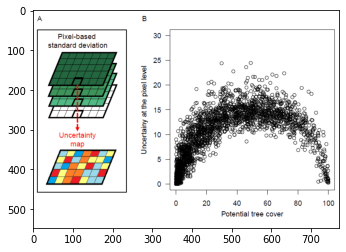

In [27]:
import urllib
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/3268863', headers)
recordGet = json.loads(r.text)
image = urllib.request.urlretrieve(recordGet['files'][0]['links']['self'], '3268863.jpg' )
plt.imshow(mpimg.imread("3268863.jpg"))
plt.show()